# Exploratory Data Analysis - read dataframes

In [153]:
# imports

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates

%matplotlib inline

In [241]:
# read the CSV files

df = pd.read_csv('cases_with_mask_use.csv')


## mask.csv basic inspection

In [155]:
# check the size of dataframes  
df.shape

(17486, 12)

In [156]:
# check how many null values are in each

df.isnull().sum()


county                 0
totalcountconfirmed    0
totalcountdeaths       0
newcountconfirmed      0
newcountdeaths         0
date                   0
NEVER                  0
RARELY                 0
SOMETIMES              0
FREQUENTLY             0
ALWAYS                 0
population             0
dtype: int64

In [157]:
# check whether all the columns are in the dtype we want

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17486 entries, 0 to 17485
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   county               17486 non-null  object 
 1   totalcountconfirmed  17486 non-null  float64
 2   totalcountdeaths     17486 non-null  float64
 3   newcountconfirmed    17486 non-null  int64  
 4   newcountdeaths       17486 non-null  int64  
 5   date                 17486 non-null  object 
 6   NEVER                17486 non-null  float64
 7   RARELY               17486 non-null  float64
 8   SOMETIMES            17486 non-null  float64
 9   FREQUENTLY           17486 non-null  float64
 10  ALWAYS               17486 non-null  float64
 11  population           17486 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 1.6+ MB


In [158]:
# check how many counties we have

df.nunique()

county                   58
totalcountconfirmed    7956
totalcountdeaths       1269
newcountconfirmed      1313
newcountdeaths          108
date                    302
NEVER                    37
RARELY                   38
SOMETIMES                46
FREQUENTLY               45
ALWAYS                   54
population               58
dtype: int64

In [159]:
df.describe()

,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population
count,17486.000000,17486.000000,17486.000000,17486.000000,17486.000000,17486.000000,17486.000000,17486.000000,17486.000000,1.748600e+04
mean,11864.667048,196.650292,161.083438,1.810248,0.032278,0.030698,0.063649,0.158543,0.714797,6.824013e+05
std,45130.684475,784.510735,777.737090,9.369938,0.028532,0.026178,0.033899,0.040410,0.092762,1.456244e+06
min,0.000000,0.000000,-578.000000,-16.000000,0.001000,0.000000,0.004000,0.058000,0.482000,1.129000e+03
25%,83.000000,1.000000,1.000000,0.000000,0.015000,0.013000,0.040000,0.134000,0.661000,4.590500e+04
50%,930.000000,13.000000,13.000000,0.000000,0.023000,0.023000,0.058000,0.156000,0.737000,1.928430e+05
75%,7530.000000,105.000000,81.000000,0.000000,0.043000,0.043000,0.084000,0.186000,0.786000,7.621480e+05
max,937985.000000,12955.000000,28549.000000,318.000000,0.140000,0.135000,0.162000,0.276000,0.889000,1.003911e+07


In [160]:
df.columns

Index(['county', 'totalcountconfirmed', 'totalcountdeaths',
       'newcountconfirmed', 'newcountdeaths', 'date', 'NEVER', 'RARELY',
       'SOMETIMES', 'FREQUENTLY', 'ALWAYS', 'population'],
      dtype='object')

In [242]:
# fix dtype of date

df['date'] = pd.to_datetime(df['date'])


In [243]:
# sort the dataframe by name of counties & date
# check the top 5 lines 
df = df.sort_values(['county', 'date'])
df.head()

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population
10238,Alameda,29.0,0.0,29,0,2020-03-18,0.019,0.008,0.055,0.123,0.795,1671329
10239,Alameda,36.0,0.0,7,0,2020-03-19,0.019,0.008,0.055,0.123,0.795,1671329
10240,Alameda,42.0,0.0,6,0,2020-03-20,0.019,0.008,0.055,0.123,0.795,1671329
10241,Alameda,62.0,0.0,20,0,2020-03-21,0.019,0.008,0.055,0.123,0.795,1671329
10242,Alameda,72.0,1.0,10,1,2020-03-22,0.019,0.008,0.055,0.123,0.795,1671329


In [244]:

# make new columns normalized to population
# popular metrics used lists numbers per 100K population, so follow the same method

df['confirmedper100k'] = df['totalcountconfirmed']/df['population']*100000
df['newlyconfirmedper100k'] = df['newcountconfirmed']/df['population']*100000
df['deathper100k'] = df['totalcountdeaths']/df['population']*100000
df['newdeath100k'] = df['newcountdeaths']/df['population']*100000


df.index

Int64Index([10238, 10239, 10240, 10241, 10242, 10243, 10244, 10245, 10246,
            10247,
            ...
             3009,  3010,  3011,  3012,  3013,  3014,  3015,  3016,  3017,
             3018],
           dtype='int64', length=17486)

In [253]:
# daily cases fluctuate a lot
# added 7-day rolling average columns to smooth out the variations 

df_bycounty = pd.DataFrame(df.groupby('county', sort=False)['newlyconfirmedper100k'].rolling(7).mean())
df_bycounty.set_index(keys=df.index, inplace=True)
df_bycounty.tail(30)
df_bycounty.columns = ['7dayrollingavg_newlyconfirmed']

merged = pd.merge(df, df_bycounty, left_index=True, right_index=True)



In [251]:
# repeat for daily deaths count
# pd. merge used to avoid conflict with groupby().rolling function 


df_bycounty2 = pd.DataFrame(df.groupby('county', sort=False)['newdeath100k'].rolling(7).mean())
df_bycounty2.set_index(keys=df.index, inplace=True)

df_bycounty2.columns = ['7dayrollingavg_newdeath']

merged2 = pd.merge(merged, df_bycounty2, left_index=True, right_index=True)


df = merge2.copy()
df.tail(30)

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population,confirmedper100k,newlyconfirmedper100k,deathper100k,newdeath100k,7dayrollingavg_newlyconfirmed,7dayrollingavg_newdeath
2989,Yuba,2891.0,13.0,40,3,2020-12-15,0.057,0.035,0.071,0.167,0.669,78668,3674.937713,50.846596,16.525144,3.813495,75.180324,0.363190
2990,Yuba,2980.0,14.0,89,1,2020-12-16,0.057,0.035,0.071,0.167,0.669,78668,3788.071389,113.133676,17.796309,1.271165,84.804858,0.726380
2991,Yuba,3035.0,14.0,55,0,2020-12-17,0.057,0.035,0.071,0.167,0.669,78668,3857.985458,69.914069,17.796309,0.000000,78.267439,0.726380
2992,Yuba,3097.0,14.0,62,0,2020-12-18,0.057,0.035,0.071,0.167,0.669,78668,3936.797681,78.812224,17.796309,0.000000,81.354553,0.726380
2993,Yuba,3168.0,15.0,71,1,2020-12-19,0.057,0.035,0.071,0.167,0.669,78668,4027.050389,90.252708,19.067473,1.271165,86.439213,0.907975
2994,Yuba,3254.0,15.0,86,0,2020-12-20,0.057,0.035,0.071,0.167,0.669,78668,4136.370570,109.320181,19.067473,0.000000,90.797493,0.907975
2995,Yuba,3329.0,15.0,75,0,2020-12-21,0.057,0.035,0.071,0.167,0.669,78668,4231.707937,95.337367,19.067473,0.000000,86.802403,0.907975
2996,Yuba,3379.0,15.0,50,0,2020-12-22,0.057,0.035,0.071,0.167,0.669,78668,4295.266182,63.558245,19.067473,0.000000,88.618353,0.363190
2997,Yuba,3438.0,16.0,59,1,2020-12-23,0.057,0.035,0.071,0.167,0.669,78668,4370.264911,74.998729,20.338638,1.271165,83.170503,0.363190
2998,Yuba,3483.0,17.0,45,1,2020-12-24,0.057,0.035,0.071,0.167,0.669,78668,4427.467331,57.202420,21.609803,1.271165,81.354553,0.544785


In [145]:
# last 4 columns have null values 
# because rolling window = 7, thus first 6 days for each county lists null values

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17486 entries, 10238 to 3018
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   county                         17486 non-null  object        
 1   totalcountconfirmed            17486 non-null  float64       
 2   totalcountdeaths               17486 non-null  float64       
 3   newcountconfirmed              17486 non-null  int64         
 4   newcountdeaths                 17486 non-null  int64         
 5   date                           17486 non-null  datetime64[ns]
 6   NEVER                          17486 non-null  float64       
 7   RARELY                         17486 non-null  float64       
 8   SOMETIMES                      17486 non-null  float64       
 9   FREQUENTLY                     17486 non-null  float64       
 10  ALWAYS                         17486 non-null  float64       
 11  population  

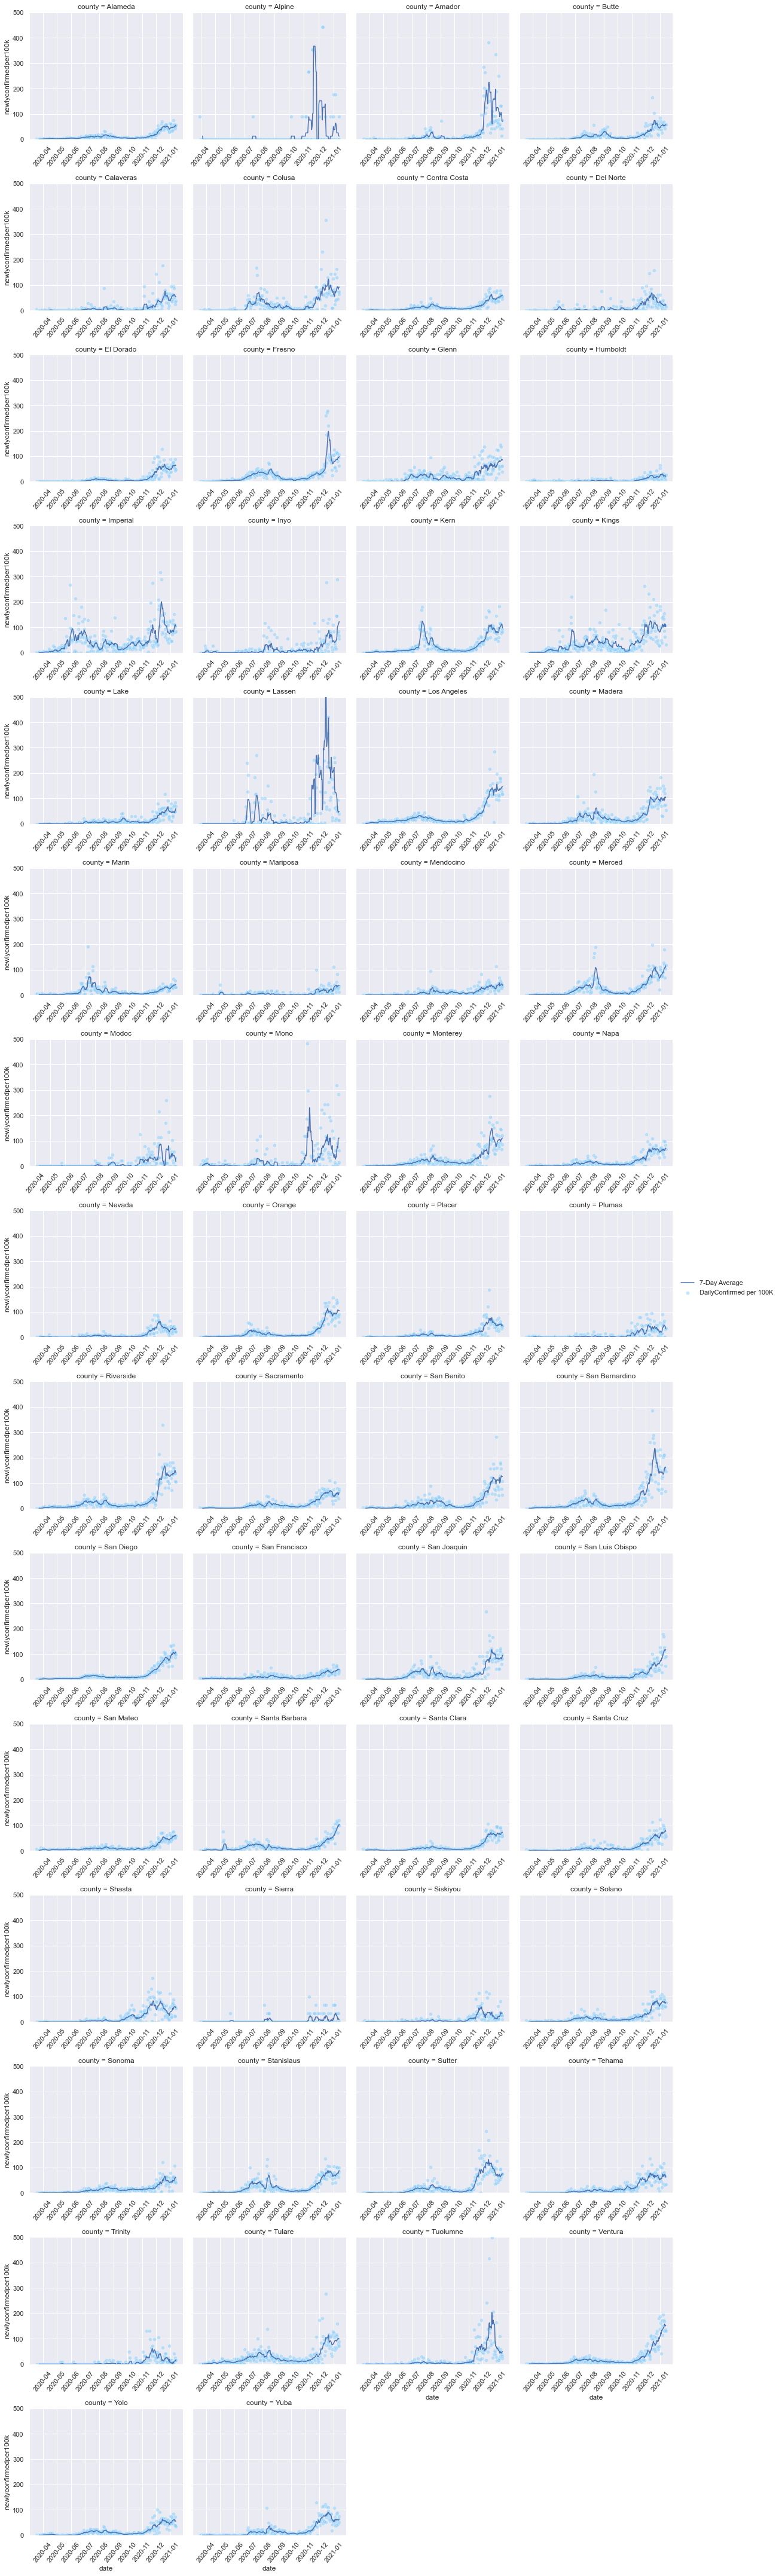

In [249]:
# graph the daily confirmed normalized by 100k population 
# light blue dots = normalized daily count
# dark blue line = 7-day rolling average


sns.set_theme(style="darkgrid")

g = sns.FacetGrid(df, col="county", col_wrap=4, height=4, aspect=1, sharex=False, margin_titles=True, ylim=(0,500))
g.map(sns.lineplot, "date", '7dayrollingavg_newlyconfirmed', label='7-Day Average')
g.map(sns.scatterplot, "date", 'newlyconfirmedper100k', alpha=.5, color='lightskyblue', label='DailyConfirmed per 100K')

xformatter = mdates.DateFormatter("%y/%m")

g.axes[0].xaxis.set_major_formatter(xformatter)

g.set_xticklabels(rotation=50)
g.fig.tight_layout()
g.add_legend()

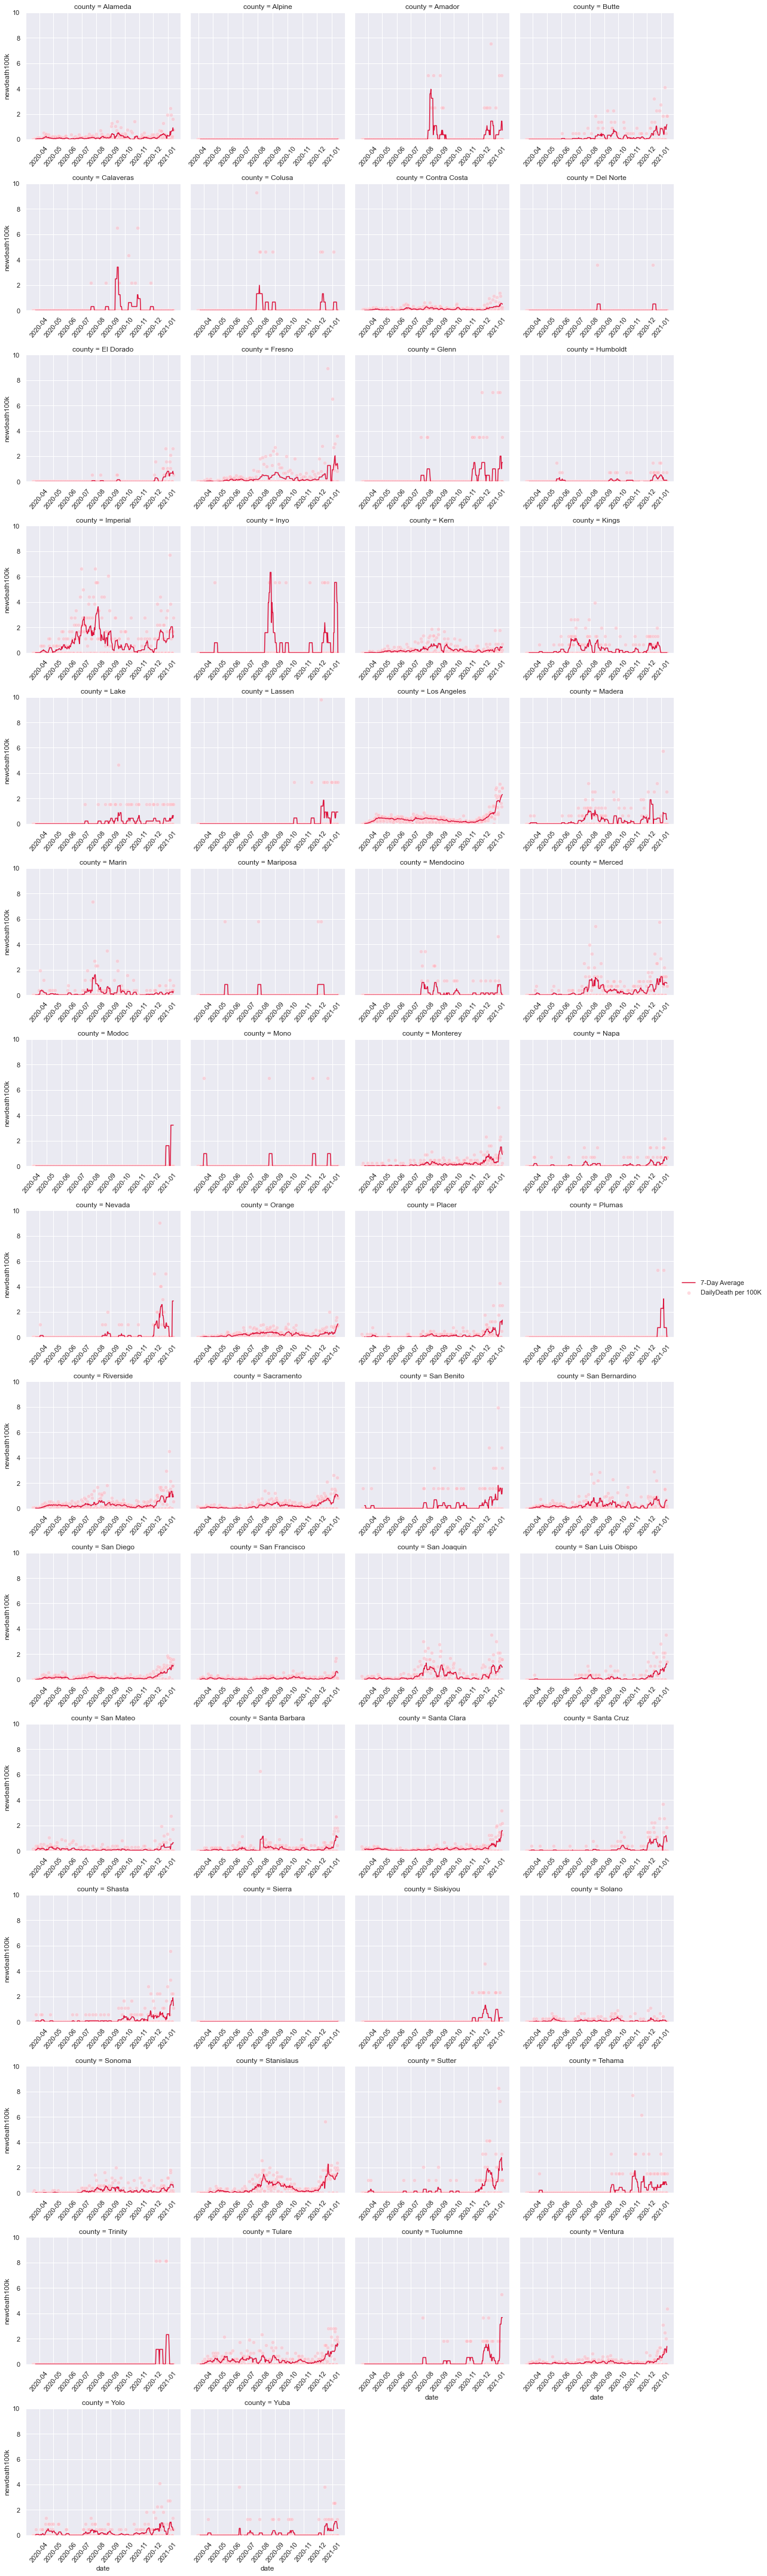

In [255]:
# graph the daily deaths normalized by 100k population 
# light pink dots = normalized daily deaths
# dark red line = 7-day rolling average

g = sns.FacetGrid(df, col="county", col_wrap=4, height=4, aspect=1, sharex=False, margin_titles=True, ylim=(0,10))
g.map(sns.lineplot, "date", '7dayrollingavg_newdeath', color='crimson', label='7-Day Average')
g.map(sns.scatterplot, "date", 'newdeath100k', alpha=.5, color='lightpink', label='DailyDeath per 100K')

xformatter = mdates.DateFormatter("%y/%m")

g.axes[0].xaxis.set_major_formatter(xformatter)

g.set_xticklabels(rotation=50)
g.fig.tight_layout()

g.add_legend()

- however, normalized graphs can exaggerate the fluctuations where the population is low
- ex) 1 confirmed out of 10 population = 10% increase
- in order to decide what constitutes as an "outbreak," let's look at the raw numbers before normalization 

In [256]:

# repeat the same process of generating a new column of rolling average
# but this time, use the raw numbers - NOT normalized per population



df_bycounty3 = pd.DataFrame(df.groupby('county', sort=False)['newcountconfirmed'].rolling(7).mean())
df_bycounty3.set_index(keys=df.index, inplace=True)
df_bycounty3.tail(30)
df_bycounty3.columns = ['7dayrollingavg_newlyconfirmed_rawnumber']

merged3 = pd.merge(df, df_bycounty3, left_index=True, right_index=True)

df_bycounty4 = pd.DataFrame(df.groupby('county', sort=False)['newcountdeaths'].rolling(7).mean())
df_bycounty4.set_index(keys=df.index, inplace=True)

df_bycounty4.columns = ['7dayrollingavg_newdeath_rawnumber']

merged4 = pd.merge(merged3, df_bycounty4, left_index=True, right_index=True)
df = merged4.copy()
df.tail(30)

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population,confirmedper100k,newlyconfirmedper100k,deathper100k,newdeath100k,7dayrollingavg_newlyconfirmed,7dayrollingavg_newdeath,7dayrollingavg_newlyconfirmed_rawnumber,7dayrollingavg_newdeath_rawnumber
2989,Yuba,2891.0,13.0,40,3,2020-12-15,0.057,0.035,0.071,0.167,0.669,78668,3674.937713,50.846596,16.525144,3.813495,75.180324,0.363190,59.142857,0.285714
2990,Yuba,2980.0,14.0,89,1,2020-12-16,0.057,0.035,0.071,0.167,0.669,78668,3788.071389,113.133676,17.796309,1.271165,84.804858,0.726380,66.714286,0.571429
2991,Yuba,3035.0,14.0,55,0,2020-12-17,0.057,0.035,0.071,0.167,0.669,78668,3857.985458,69.914069,17.796309,0.000000,78.267439,0.726380,61.571429,0.571429
2992,Yuba,3097.0,14.0,62,0,2020-12-18,0.057,0.035,0.071,0.167,0.669,78668,3936.797681,78.812224,17.796309,0.000000,81.354553,0.726380,64.000000,0.571429
2993,Yuba,3168.0,15.0,71,1,2020-12-19,0.057,0.035,0.071,0.167,0.669,78668,4027.050389,90.252708,19.067473,1.271165,86.439213,0.907975,68.000000,0.714286
2994,Yuba,3254.0,15.0,86,0,2020-12-20,0.057,0.035,0.071,0.167,0.669,78668,4136.370570,109.320181,19.067473,0.000000,90.797493,0.907975,71.428571,0.714286
2995,Yuba,3329.0,15.0,75,0,2020-12-21,0.057,0.035,0.071,0.167,0.669,78668,4231.707937,95.337367,19.067473,0.000000,86.802403,0.907975,68.285714,0.714286
2996,Yuba,3379.0,15.0,50,0,2020-12-22,0.057,0.035,0.071,0.167,0.669,78668,4295.266182,63.558245,19.067473,0.000000,88.618353,0.363190,69.714286,0.285714
2997,Yuba,3438.0,16.0,59,1,2020-12-23,0.057,0.035,0.071,0.167,0.669,78668,4370.264911,74.998729,20.338638,1.271165,83.170503,0.363190,65.428571,0.285714
2998,Yuba,3483.0,17.0,45,1,2020-12-24,0.057,0.035,0.071,0.167,0.669,78668,4427.467331,57.202420,21.609803,1.271165,81.354553,0.544785,64.000000,0.428571


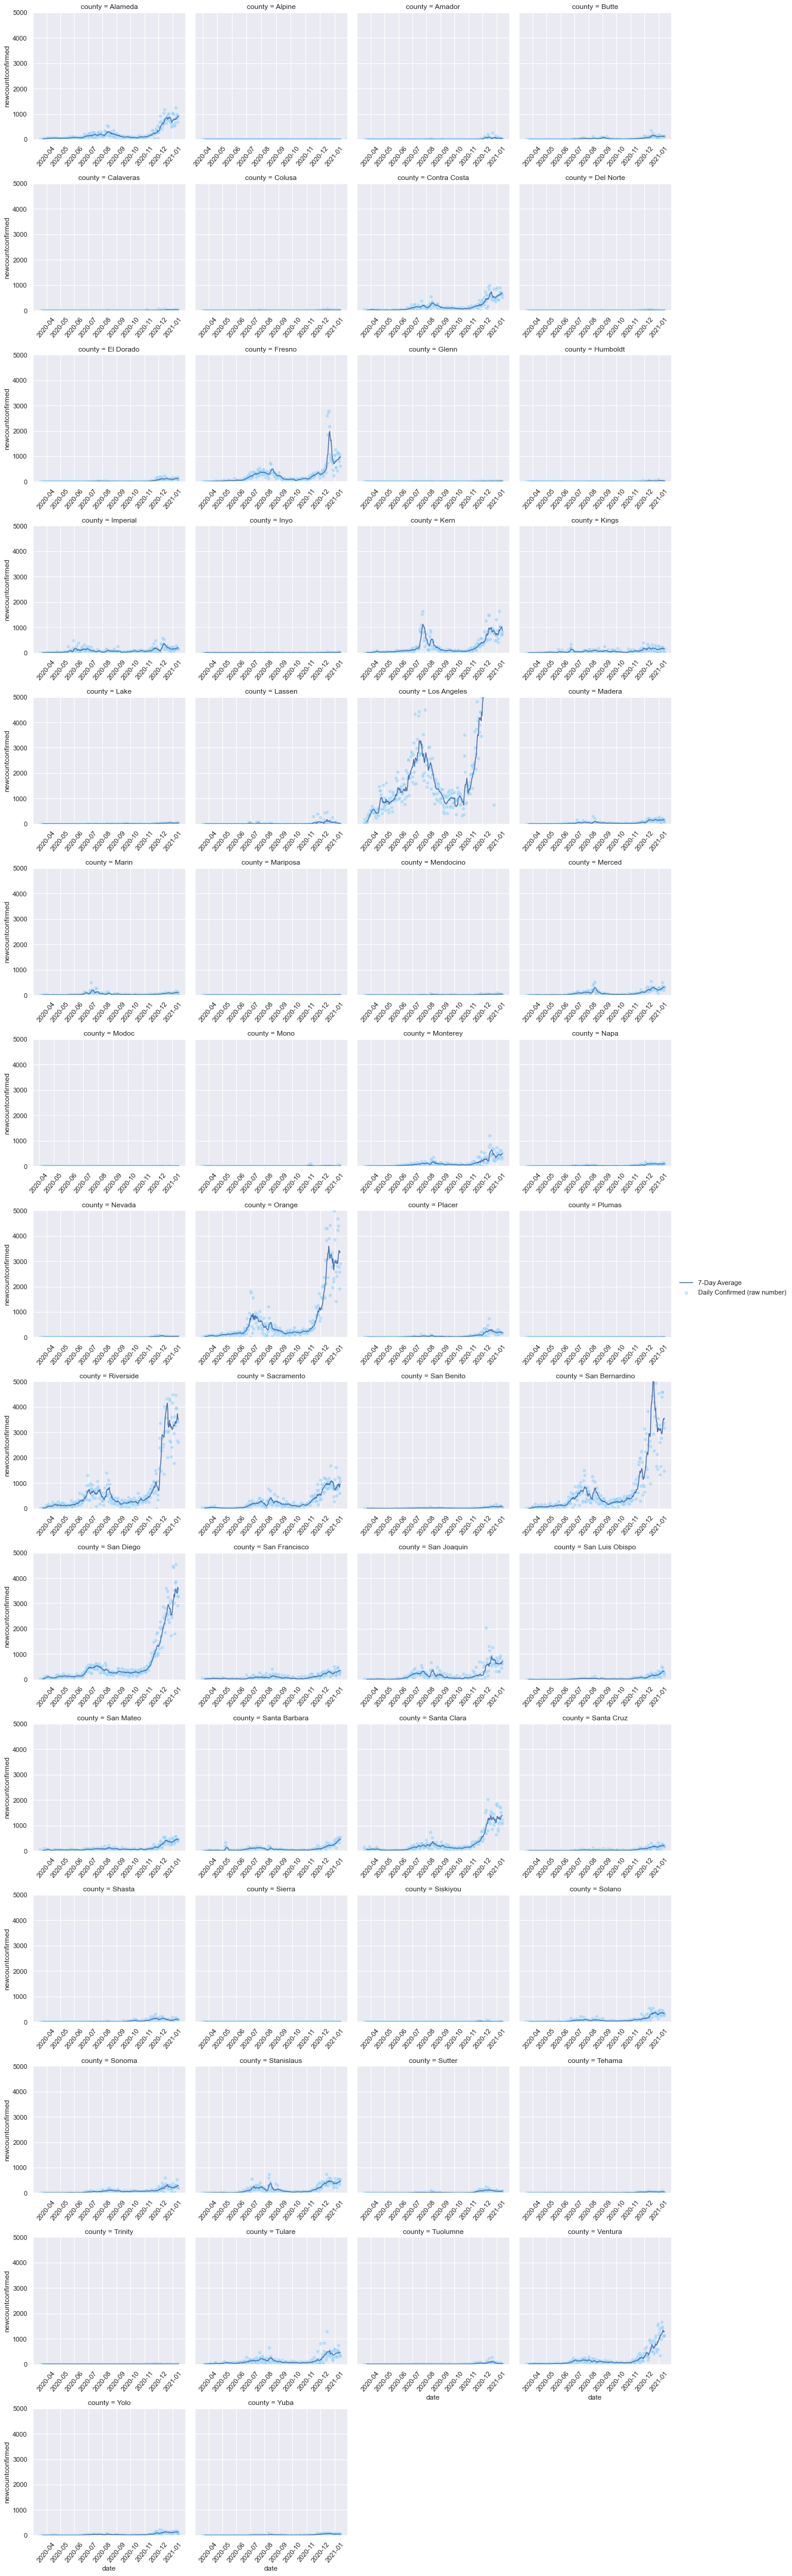

In [261]:
# graph the raw number of confirmed cases for each county
# on same y-axis scale to show the population differences among counties 


sns.set_theme(style="darkgrid")

g = sns.FacetGrid(df, col="county", col_wrap=4, height=4, aspect=1, sharex=False, margin_titles=True, ylim=(0,5000))
g.map(sns.lineplot, "date", '7dayrollingavg_newlyconfirmed_rawnumber', label='7-Day Average')
g.map(sns.scatterplot, "date", 'newcountconfirmed', alpha=.5, color='lightskyblue', label='Daily Confirmed (raw number)')

xformatter = mdates.DateFormatter("%y/%m")

g.axes[0].xaxis.set_major_formatter(xformatter)

g.set_xticklabels(rotation=50)
g.fig.tight_layout()
g.add_legend()

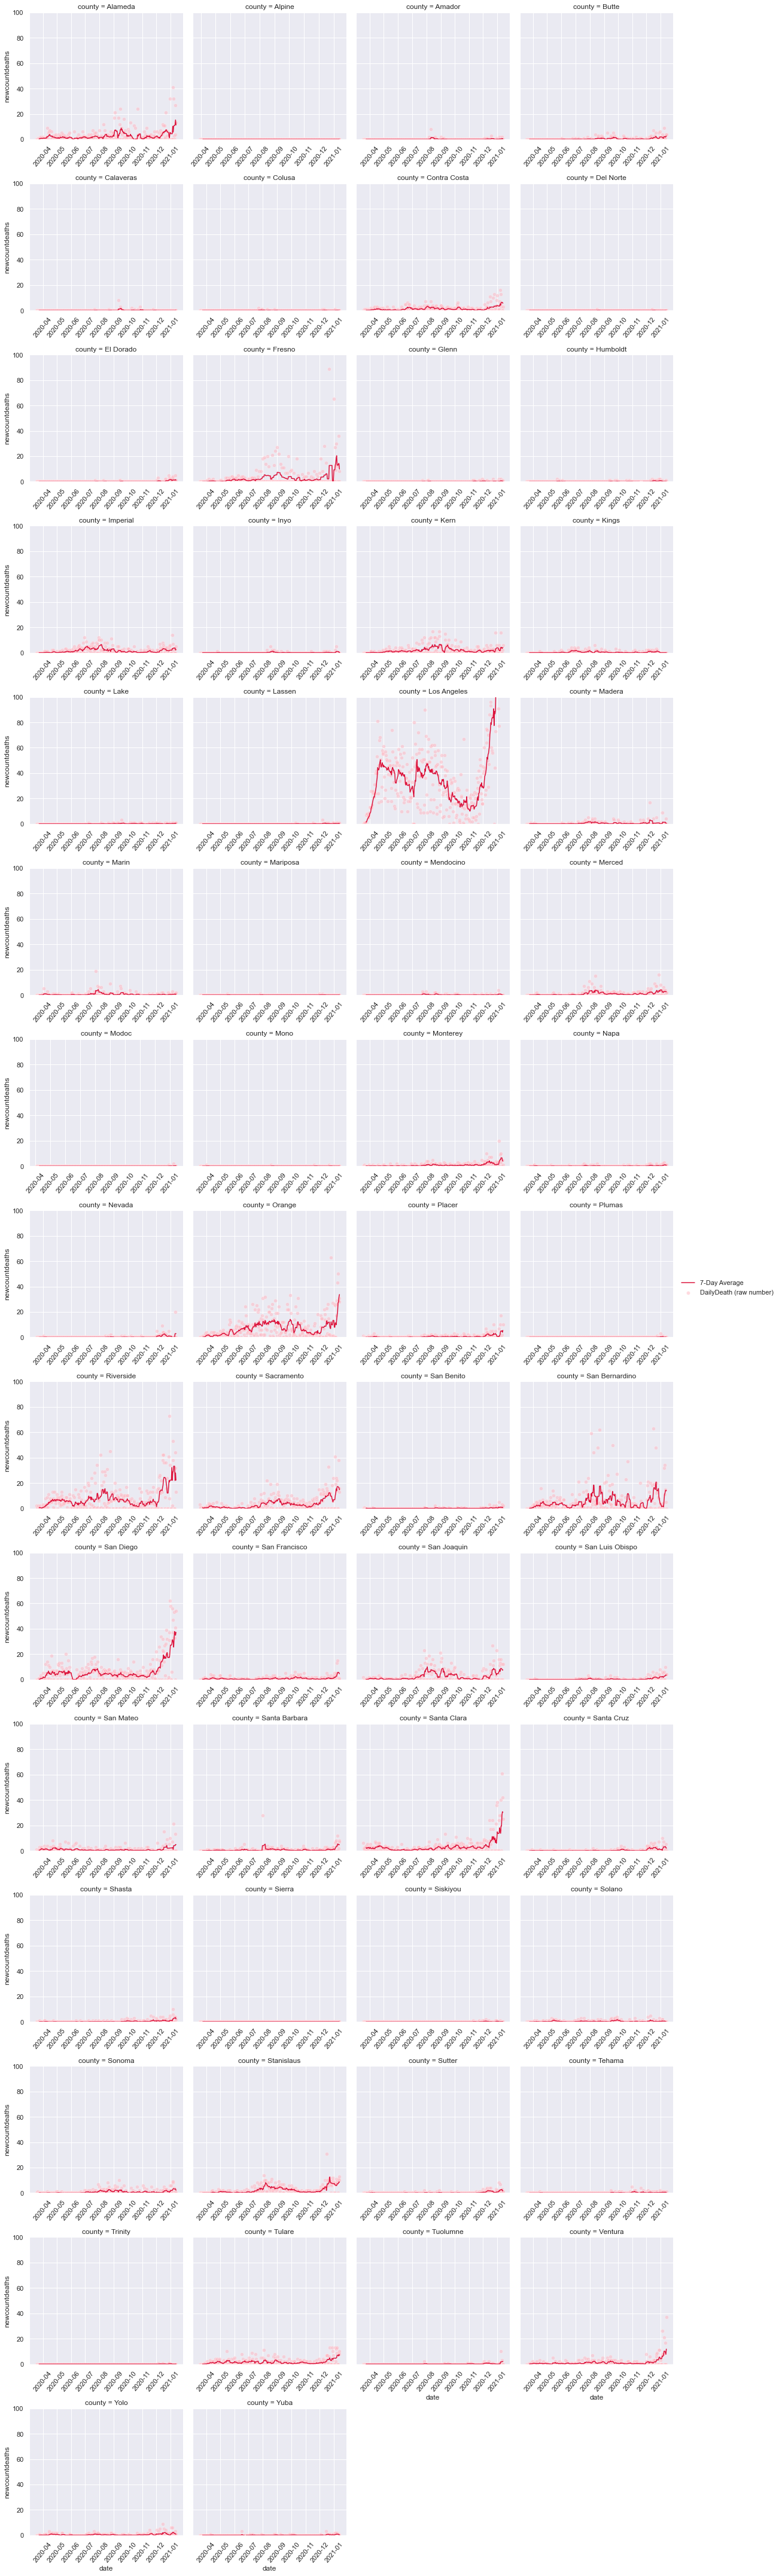

In [263]:
# graph the raw number of confirmed deaths for each county
# on same y-axis scale to show the population differences among counties 



g = sns.FacetGrid(df, col="county", col_wrap=4, height=4, aspect=1, sharex=False, margin_titles=True, ylim=(0,100))
g.map(sns.lineplot, "date", '7dayrollingavg_newdeath_rawnumber', color='crimson', label='7-Day Average')
g.map(sns.scatterplot, "date", 'newcountdeaths', alpha=.5, color='lightpink', label='DailyDeath (raw number)')

xformatter = mdates.DateFormatter("%y/%m")

g.axes[0].xaxis.set_major_formatter(xformatter)

g.set_xticklabels(rotation=50)
g.fig.tight_layout()

g.add_legend()

In [264]:
df.corr()

,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population,confirmedper100k,newlyconfirmedper100k,deathper100k,newdeath100k,7dayrollingavg_newlyconfirmed,7dayrollingavg_newdeath,7dayrollingavg_newlyconfirmed_rawnumber,7dayrollingavg_newdeath_rawnumber
totalcountconfirmed,1.000000,0.949822,0.866452,0.749547,-0.084601,-0.127947,-0.088846,-0.125150,0.149037,0.691354,0.342603,0.212407,0.360146,0.102545,0.296173,0.197686,0.913069,0.843518
totalcountdeaths,0.949822,1.000000,0.753252,0.697628,-0.085125,-0.131276,-0.092298,-0.128445,0.152876,0.798887,0.261336,0.141618,0.342834,0.082189,0.194444,0.159843,0.788879,0.795903
newcountconfirmed,0.866452,0.753252,1.000000,0.742399,-0.065983,-0.099680,-0.074482,-0.098003,0.118276,0.543334,0.294297,0.292713,0.273227,0.106398,0.341623,0.192645,0.951804,0.792793
newcountdeaths,0.749547,0.697628,0.742399,1.000000,-0.064787,-0.098021,-0.069152,-0.092419,0.113137,0.588485,0.199046,0.151223,0.223436,0.237232,0.206539,0.227708,0.766701,0.879053
NEVER,-0.084601,-0.085125,-0.065983,-0.064787,1.000000,0.322411,0.208287,0.153016,-0.539908,-0.157266,-0.074161,-0.022087,-0.161930,-0.034672,-0.028738,-0.069161,-0.069370,-0.076155
RARELY,-0.127947,-0.131276,-0.099680,-0.098021,0.322411,1.000000,0.426203,0.379223,-0.701203,-0.219864,-0.112030,-0.034277,-0.230415,-0.054535,-0.045432,-0.114020,-0.104912,-0.115733
SOMETIMES,-0.088846,-0.092298,-0.074482,-0.069152,0.208287,0.426203,1.000000,0.570585,-0.796940,-0.173346,0.041887,0.046948,-0.115553,-0.008402,0.070570,-0.021870,-0.078137,-0.081453
FREQUENTLY,-0.125150,-0.128445,-0.098003,-0.092419,0.153016,0.379223,0.570585,1.000000,-0.796274,-0.198758,-0.104299,-0.022560,-0.198655,-0.033531,-0.029000,-0.075753,-0.103155,-0.109794
ALWAYS,0.149037,0.152876,0.118276,0.113137,-0.539908,-0.701203,-0.796940,-0.796274,1.000000,0.260548,0.084494,0.009146,0.243100,0.043645,0.008534,0.094237,0.124369,0.133687
population,0.691354,0.798887,0.543334,0.588485,-0.157266,-0.219864,-0.173346,-0.198758,0.260548,1.000000,0.092152,0.048850,0.188796,0.043499,0.066652,0.087356,0.571910,0.692118
